In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import gzip
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\notebookLabo1.ipynb
.\t10k-images-idx3-ubyte.gz
.\t10k-labels-idx1-ubyte.gz
.\train-images-idx3-ubyte.gz
.\train-labels-idx1-ubyte.gz
.\.ipynb_checkpoints\notebookLabo1-checkpoint.ipynb


In [106]:
# X son los atributos (imagenes)
# Y son etiquetas (labels)
     
def leer_imagenes(data):
    #Los primeros 4 bits son magic number
    #El magicNumber no lo necesitamos asi que lo saltamos
    magicNumber = int.from_bytes(data.read(4), "big")
    #Los siguientes 4 bits son el numero de imagenes
    num_images = int.from_bytes(data.read(4), "big")
    #Los siguientes 4 bits son el numero de filas por imagen
    rows = int.from_bytes(data.read(4), "big")
    #Los siguientes 4 bits son el numero de columnas por imagen
    cols = int.from_bytes(data.read(4), "big")
    #A partir de ahora estan todos los bits de los pixeles
    images = data.read()
    #Pasamos los datos a numpy
    x_ = np.frombuffer(images, dtype = np.uint8)
    #Pasamos el array a matrices por cada imagen
    x_ = x_.reshape((num_images, rows, cols))
    return x_
    
def leer_etiquetas(data):
    #Empezamos a leer despues del byte 8
    labels = data.read()[8:]
    y_ = np.frombuffer(labels, dtype = np.uint8)
    return y_
    

In [102]:
for dirname, _, filenames in os.walk('.'):
    for f in filenames:
        if "train-images" in f:
            with gzip.open(f, "rb") as data:
                    x_train = leer_imagenes(data)
        elif "train-labels" in f:
            with gzip.open(f, "rb") as data:
                    y_train = leer_etiquetas(data)
        elif "t10k-images" in f:
            with gzip.open(f, "rb") as data:
                    x_test = leer_imagenes(data)
        elif "t10k-labels" in f:
            with gzip.open(f, "rb") as data:
                    y_test = leer_etiquetas(data)

In [98]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 784)
(10000, 784)
(60000,)
(10000,)


Numero:  9


TypeError: Invalid shape (784,) for image data

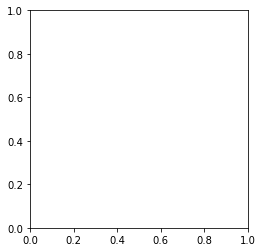

In [105]:
def mostrar_numero(imagen):
    plt.imshow(imagen.squeeze(), cmap=plt.get_cmap("gray"))
    plt.axis("off")
    
# Creo un numero del 0 al 9
numeroRandom = np.random.randint(len(y_test))
print("Numero: ",y_test[numeroRandom])
mostrar_numero(x_test[numeroRandom]) 

In [104]:
np.reshape(x_train, 28*28)
df = pd.DataFrame(x_train)

ValueError: cannot reshape array of size 47040000 into shape (784,)